In [1]:
# macro do ipython para rederizar o matplotlib inline
%matplotlib inline

# numpy é uma biblioteca de python que 
# nos permite fazer operações matriciais e vetoriais
# facilmente, e eficientemente (até um certo tamanho)
import numpy as np

import matplotlib.pyplot as plt

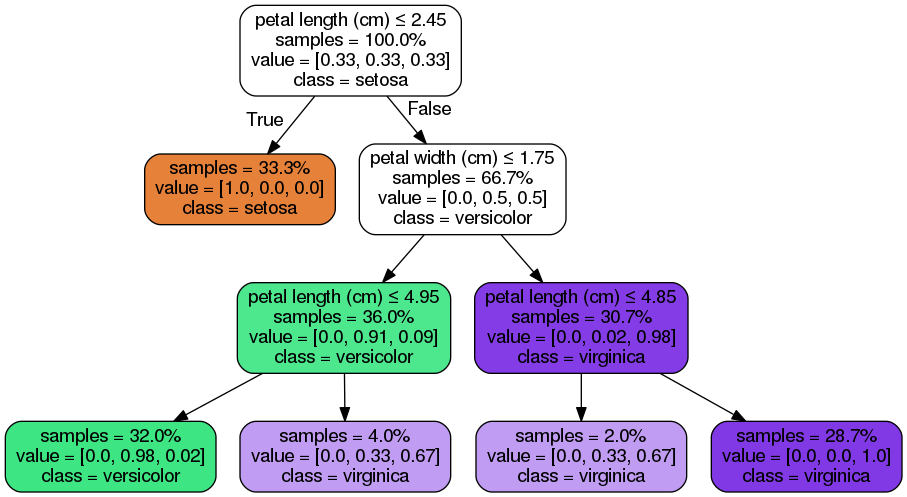

In [95]:
from sklearn.datasets import load_iris

from sklearn import tree

import pydotplus
from IPython.display import Image

# carregando o conjunto de dados iris
iris = load_iris()

# treinando a árvore de decisão do scikit-learn
dt = tree.DecisionTreeClassifier(max_depth=3, max_features=1.0, random_state=123)
dt = dt.fit(iris.data, iris.target)

# vamos mostrar a estrutura da árvore
# scikit facilita demasiadamente nossa vida.
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,
                         impurity=False, proportion= True,
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png()) 

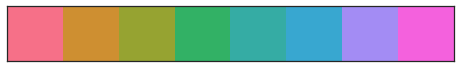

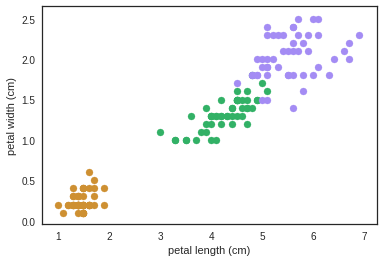

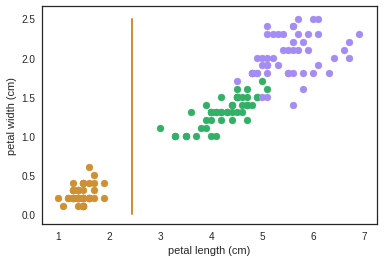

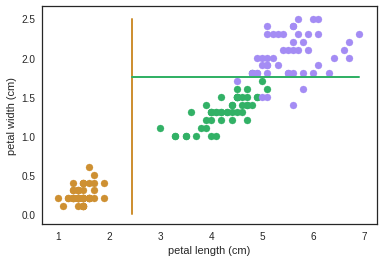

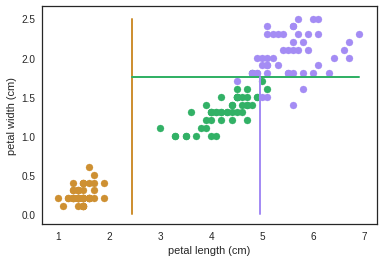

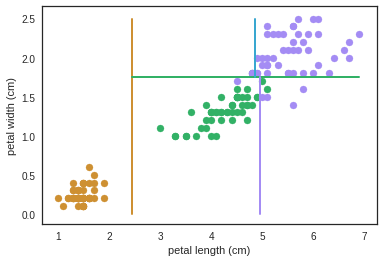

In [123]:
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

current_palette = sns.color_palette("husl", 8)

sns.palplot(current_palette)
plt.show()

sns.set_style("white")

X, y = iris.data[:, -2:], iris.target

splits = [
            ([2.45, 2.45], [0, X[:,1].max()]),
            ([2.45, X[:,0].max()], [1.75, 1.75]),
            ([4.95, 4.95], [0, 1.75]),
            ([4.85, 4.85], [1.75,  X[:,1].max()]),
         ]

colors = [current_palette[1], current_palette[3], current_palette[6], current_palette[5]]
# dados sem os cortes da árvore
for i, c in enumerate(np.unique(y)):
    mask = y == c
    plt.scatter(X[mask,0], X[mask, 1], c=colors[i])
ax = plt.gca()
ax.set_xlabel(iris.feature_names[-2])
ax.set_ylabel(iris.feature_names[-1])
plt.show()
        

for i in range(len(splits)):
    for j, c in enumerate(np.unique(y)):
        mask = y == c
        plt.scatter(X[mask,0], X[mask, 1], c=colors[j])
    for j in range(i + 1):
        plt.plot(splits[j][0], splits[j][1], c=colors[j], linewidth=2)
    ax = plt.gca()
    ax.set_xlabel(iris.feature_names[-2])
    ax.set_ylabel(iris.feature_names[-1])
    plt.show()

(-0.05, 1.05)

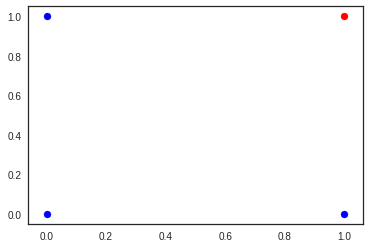

In [124]:
X = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]])

y = np.array([1, 1, 1, 0])

pos = (y == 1)

plt.scatter(X[pos, 0], X[pos, 1], color='b')
plt.scatter(X[~pos, 0], X[~pos, 1], color='r')
axes = plt.gca()
axes.set_ylim(-0.05, 1.05)

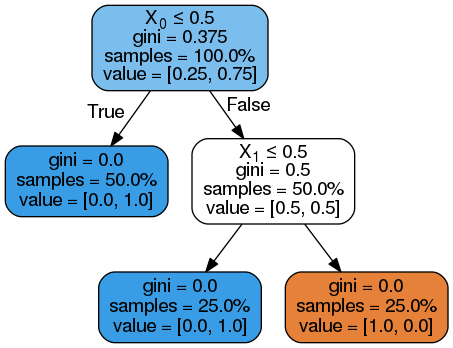

In [127]:
dt = tree.DecisionTreeClassifier(max_depth=3, max_features=1.0, random_state=123)
dt = dt.fit(X, y)

# vamos mostrar a estrutura da árvore
# scikit facilita demasiadamente nossa vida.
dot_data = tree.export_graphviz(dt, out_file=None, 
                         impurity=True, proportion= True,
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png()) 